# <font color='hotblue'>Data Exploration, Cleaning and Hypothesis testing</font>

## Exploratory Data Analysis for Machine Learning - IBM Coursera

# Data Description

The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors.

The original dataset has been replaced in Kaggle, here’s the link for the original dataset from Dataworld:

https://data.world/data-society/imdb-5000-movie-dataset


| Variable Name             | Description                                                                                       |
|---------------------------|---------------------------------------------------------------------------------------------------|
| movie_title               | Title of the Movie                                                                                |
| duration                  | Duration in minutes                                                                               |
| director_name             | Name of the Director of the Movie                                                                 |
| director_facebook_likes   | Number of likes of the Director on his Facebook Page                                              |
| actor_1_name              | Primary actor starring in the movie                                                               |
| actor_1_facebook_likes    | Number of likes of the Actor_1 on his/her Facebook Page                                           |
| actor_2_name              | Other actor starring in the movie                                                                 |
| actor_2_facebook_likes    | Number of likes of the Actor_2 on his/her Facebook Page                                           |
| actor_3_name              | Other actor starring in the movie                                                                 |
| actor_3_facebook_likes    | Number of likes of the Actor_3 on his/her Facebook Page                                           |
| num_user_for_reviews      | Number of users who gave a review                                                                 |
| num_critic_for_reviews    | Number of critical reviews on imdb                                                                |
| num_voted_users           | Number of people who voted for the movie                                                          |
| cast_total_facebook_likes | Total number of facebook likes of the entire cast of the movie                                    |
| movie_facebook_likes      | Number of Facebook likes in the movie page                                                        |
| plot_keywords             | Keywords describing the movie plot                                                                |
| facenumber_in_poster      | Number of the actor who featured in the movie poster                                              |
| color                     | Film colorization. ‘Black and White’ or ‘Color’                                                   |
| genres                    | Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’ |
| title_year                | The year in which the movie is released (1916:2016)                                               |
| language                  | English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc                           |
| country                   | Country where the movie is produced                                                               |
| content_rating            | Content rating of the movie                                                                       |
| aspect_ratio              | Aspect ratio the movie was made in                                                                |
| movie_imdb_link           | IMDB link of the movie                                                                            |
| gross                     | Gross earnings of the movie in Dollars                                                            |
| budget                    | Budget of the movie in Dollars                                                                    |
| imdb_score                | IMDB Score of the movie on IMDB                                                                   |

# Initial Plan for Data Exploration

First we need to clean data, so we can plot some graphical visualizations for distribuition and correlation.

# Importing Required Modules

In [1]:
# 'stats from scipy' statistical package 
from scipy import stats
# 'pandas' package used for data manipulation
import pandas as pd
# 'matplotlib, seaborn and plotnine' used for graphs plotting
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
# 'numpy' used for numerical calculation
import numpy as np

# Read Dataframe

In [2]:
# Read CSV file as DataFrame
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Return n_rows x n_columns from dataframe
df.shape

(5043, 28)

In [4]:
# return variable types for each column in the dataframe
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

# Data Exploration and Cleaning

In [5]:
# Remove useless column
df.drop('movie_imdb_link', axis = 1, inplace = True)

In [6]:
# count values for color column
df['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

Total Count: 5024
Color Percentage: 95.83996815286623
Black & White Percentage: 4.160031847133758


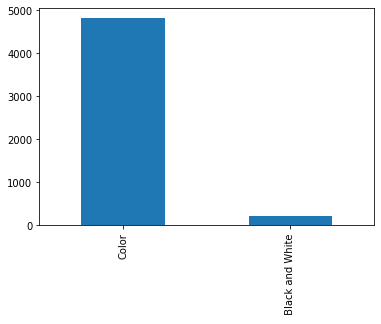

In [7]:
# Analyzing color values

# There are 2 possible values for color column
color, bw = df['color'].value_counts() 

# Total count values for color column
total_casos = color + bw

# Observations number.
print('Total Count:', total_casos)
print('Color Percentage:', (color / total_casos) * 100)
print('Black & White Percentage:', (bw / total_casos) * 100)

# bar bar plot
df['color'].value_counts().plot.bar()

In [8]:
# Remove useless color column:
df.drop('color', axis = 1, inplace = True)

### Missing Data

In [9]:
# Return True for any column with NA (missing) Value
df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [10]:
# return sum NA values for each column
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [11]:
# droping na rows for subset columns
df.dropna(axis = 0, subset = ['director_name', 'num_critic_for_reviews',
                               'duration','director_facebook_likes','actor_3_facebook_likes',
                               'actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name',
                               'facenumber_in_poster','num_user_for_reviews','language','country',
                               'actor_2_facebook_likes','plot_keywords', 'title_year'],inplace=True)

In [12]:
# new dataframe shape
df.shape

(4737, 26)

In [13]:
# Analyzing content_rating column.
df['content_rating'].value_counts()

R            2082
PG-13        1436
PG            681
G             109
Not Rated     100
Unrated        58
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-14           3
TV-G            3
TV-PG           1
Name: content_rating, dtype: int64

In [14]:
# fill NA values with most comum value (R) in content_rating column.
df['content_rating'].fillna('R', inplace = True)

In [15]:
# Analyzing 'aspect_ratio'
df['aspect_ratio'].value_counts()

2.35     2311
1.85     1884
1.37       97
1.78       80
1.66       63
1.33       34
2.20       15
2.39       14
16.00       8
2.00        4
1.75        3
2.40        3
2.76        3
2.55        2
1.50        2
2.24        1
1.20        1
1.18        1
1.44        1
1.77        1
Name: aspect_ratio, dtype: int64

In [16]:
# fill NA with Median Values.
print('aspect_ratio - Median Value:', df['aspect_ratio'].median())
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace = True)

aspect_ratio - Median Value: 2.35


In [17]:
# fill NA with Median Values.
print('budget - Median Value:', df['budget'].median())
df['budget'].fillna(df['budget'].median(), inplace = True)

budget - Median Value: 20000000.0


In [18]:
# fill NA with Median Values.
print('gross - Median Value:', df['gross'].median())
df['gross'].fillna(df['gross'].median(), inplace = True)

gross - Median Value: 26005908.0


In [19]:
# Looking if there some NA value left.
df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

### Duplicate Data

In [20]:
# sum duplicated data values.
df.duplicated().sum()

42

In [21]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [22]:
# dataframe shape
df.shape

(4695, 26)

### Data Relevance Analysis

In [23]:
# count language column values
df['language'].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Korean           8
Portuguese       8
Danish           5
Dutch            4
Persian          4
Swedish          4
Norwegian        4
Hebrew           4
Thai             3
Arabic           3
None             2
Indonesian       2
Dari             2
Zulu             2
Aboriginal       2
Aramaic          1
Icelandic        1
Bosnian          1
Mongolian        1
Dzongkha         1
Romanian         1
Czech            1
Vietnamese       1
Filipino         1
Hungarian        1
Polish           1
Maya             1
Telugu           1
Kazakh           1
Greek            1
Name: language, dtype: int64

In [24]:
# drop language column
df.drop('language', axis = 1, inplace = True)

In [25]:
# count country values
df['country'].value_counts()

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Ireland             11
Denmark             11
Mexico              11
Russia              11
South Africa         8
Brazil               8
Norway               7
Netherlands          5
Sweden               5
Thailand             4
Argentina            4
Iran                 4
West Germany         3
Belgium              3
Czech Republic       3
Switzerland          3
Israel               3
Iceland              2
Taiwan               2
Greece               2
Romania              2
Poland               2
Hungary              2
New Line             1
Indonesia            1
Afghanistan          1
Soviet Union         1
Colombia             1
Nigeria              1
Turkey     

In [26]:
# drop country column
df.drop('country', axis = 1, inplace = True)

### Graphical Analysis of Variable Relationships

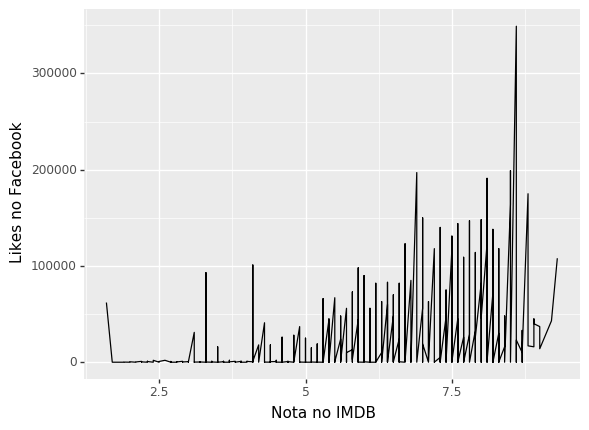

<ggplot: (-9223371857471575624)>

In [27]:
# Graphical correlation analysis between 'imdb_score' and 'movie_facebook_likes'
(ggplot(df) +\
    aes(x = 'imdb_score', y = 'movie_facebook_likes') +\
    geom_line() +\
    labs(tittle = 'Nota IMDB vs Likes no Facebook do filme', x = 'Nota no IMDB', y = 'Likes no Facebook')
)

Looking above, there are some positive correlation between imdb_score and movie_facebook_likes.

### Low number of repeated observations

In [28]:
# Dropping columns with low number of equal observations.
df.drop(columns = ['director_name', 'actor_1_name', 'actor_2_name', 
                   'actor_3_name', 'plot_keywords', 'movie_title'], axis = 1, inplace = True)

In [29]:
# count values genres column
df['genres'].value_counts()

Drama                                              209
Comedy                                             186
Comedy|Drama|Romance                               182
Comedy|Drama                                       180
Comedy|Romance                                     149
                                                  ... 
Animation|Comedy|Family|Fantasy|Musical|Romance      1
Drama|Family|Music|Romance                           1
Biography|Drama|Family|Sport                         1
Biography|Drama|History|Music                        1
Action|Drama|History|Thriller|War                    1
Name: genres, Length: 875, dtype: int64

In [30]:
# drop genres columns.
df.drop('genres', axis = 1, inplace = True)

In [31]:
# head of dataframe
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


# Hypotheses

#### 1st Hypothesis
Null Hypothesis: There is no relationship between Gross and Budget.

Alternative Hypothesis: There is relationship between Gross and Budget.

#### 2nd Hypothesis
Null Hypothesis: There is no significant relationship between 'imdb score' and 'movie facebook likes'.

Alternative Hypothesis: There is relationship between 'imdb score' and 'movie facebook likes'.

#### 3nd Hypothesis
Null Hypothesis: There is no relationship between 'title year' and 'num_user_reviews'.

Alternative Hypothesis: There is relationship between 'title year' and 'num_user_reviews'.

# Hypothesis testing 1

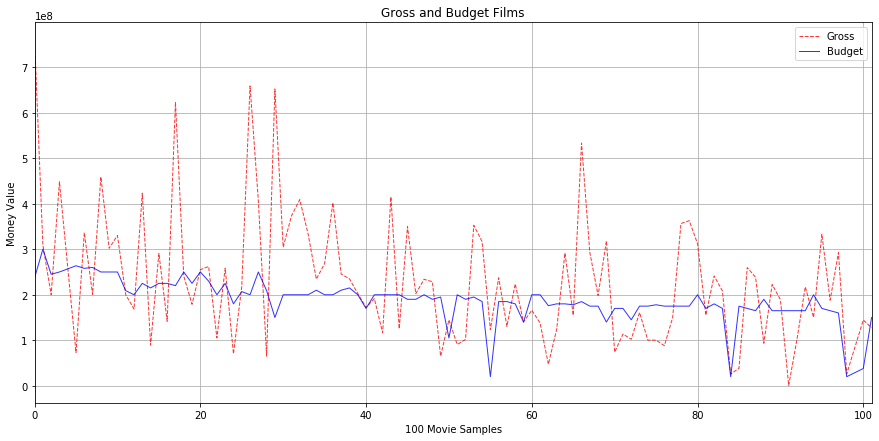

In [32]:
df2 = df.iloc[0:100]

plt.figure(figsize=(15,7))
df2.gross.plot(kind ='line',color = 'r',grid = True,alpha = 0.8,linewidth = 1,label ='Gross',linestyle = '--')
df2.budget.plot(color = 'b',grid = True,alpha = 0.8,label ='Budget',linewidth = 1,linestyle = '-')
plt.legend()
plt.xlabel('100 Movie Samples')
plt.ylabel('Money Value')
plt.title('Gross and Budget Films')
plt.show()

### Null Hypothesis: 
There is no relationship between Gross and Budget
### Alternative Hypothesis:
There is relationship between Gross and Budget

In [33]:
gross = np.array(df['gross'])
budget = np.array(df['budget'])
stats.ttest_ind(gross, budget)

Ttest_indResult(statistic=2.075255727942378, pvalue=0.03799000761436705)

### Result
With p value 0.03799000761436705 smaller than 0.05, we accept the null hypothesis at 5% significance level, meaning that there is no relationship between gross and budget.

# Next Steps

The analisys now can progress with a look at correlation between all variables, then create an linear regression to predict movie ratings.